In [169]:
import pandas as pd
import cv2
from matplotlib import pyplot as plt
import numpy as np

from sklearn.cluster import KMeans

In [31]:
from gensim.models import KeyedVectors
model_dir = 'wiki-news-300d-1M.vec'
model = KeyedVectors.load_word2vec_format(model_dir, binary=False)

In [183]:
data=pd.read_csv("0705_1.csv")

interaction_array=np.array(data['interactions'])
interaction_with_array=np.array(data['target_obj'])
action_array=np.array(data['action'])

In [184]:
data

,time,x,y,action,interactions,target_obj
0,2023-07-05 15:24:02.175896,9,256,walking,none,none
1,2023-07-05 15:24:02.380739,23,268,walking,none,none
2,2023-07-05 15:24:02.586178,51,280,walking,none,none
3,2023-07-05 15:24:02.790289,65,282,walking,none,none
4,2023-07-05 15:24:02.995030,102,292,walking,none,none
...,...,...,...,...,...,...
816,2023-07-05 15:26:59.094280,120,93,walking,none,none
817,2023-07-05 15:26:59.300249,104,111,walking,none,none
818,2023-07-05 15:26:59.505139,102,113,walking,none,none
819,2023-07-05 15:26:59.712652,74,145,standing,none,none


In [185]:
data = data[(data['action'] != 'walking') | (data['interactions'] != 'none')]

In [186]:
data[data['action'] == 'laying']

,time,x,y,action,interactions,target_obj
468,2023-07-05 15:25:38.807046,58,459,laying,none,none
469,2023-07-05 15:25:39.013985,64,434,laying,none,none
470,2023-07-05 15:25:39.218688,64,447,laying,none,none
471,2023-07-05 15:25:39.424476,67,434,laying,none,none
472,2023-07-05 15:25:39.628697,70,423,laying,none,none
...,...,...,...,...,...,...
539,2023-07-05 15:25:53.797551,67,430,laying,none,none
540,2023-07-05 15:25:54.004312,66,430,laying,none,none
541,2023-07-05 15:25:54.210651,64,439,laying,none,none
684,2023-07-05 15:26:28.281108,508,330,laying,none,none


In [187]:
data2=data.loc[:,['x','y']]

In [188]:
data2

,x,y
15,414,260
16,424,268
17,434,254
20,487,241
21,492,254
...,...,...
794,573,166
795,542,166
796,521,159
797,539,128


In [189]:
data3 = [list(e) for e in zip(data['x'],data['y'])]

In [190]:
data3

[[414, 260],
 [424, 268],
 [434, 254],
 [487, 241],
 [492, 254],
 [500, 236],
 [503, 236],
 [497, 234],
 [493, 219],
 [488, 223],
 [501, 191],
 [462, 169],
 [453, 175],
 [466, 189],
 [461, 202],
 [469, 200],
 [478, 198],
 [474, 199],
 [459, 208],
 [452, 211],
 [461, 217],
 [474, 206],
 [475, 189],
 [472, 190],
 [470, 192],
 [476, 188],
 [466, 205],
 [462, 213],
 [467, 207],
 [463, 219],
 [464, 213],
 [467, 213],
 [471, 214],
 [465, 219],
 [454, 227],
 [479, 185],
 [479, 186],
 [480, 186],
 [454, 198],
 [451, 207],
 [454, 201],
 [451, 212],
 [451, 198],
 [460, 198],
 [459, 208],
 [474, 206],
 [454, 204],
 [446, 199],
 [458, 201],
 [456, 209],
 [453, 203],
 [454, 206],
 [448, 203],
 [453, 201],
 [449, 206],
 [451, 197],
 [451, 200],
 [447, 197],
 [460, 196],
 [453, 197],
 [449, 197],
 [454, 197],
 [458, 181],
 [456, 181],
 [489, 183],
 [510, 217],
 [501, 246],
 [503, 236],
 [507, 244],
 [522, 216],
 [503, 237],
 [476, 241],
 [440, 252],
 [431, 248],
 [414, 241],
 [384, 258],
 [304, 325],

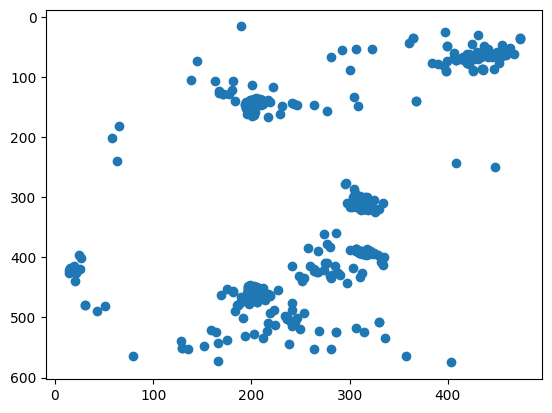

In [191]:
# data=pd.read_csv("20230623.csv")
plt.gca().invert_yaxis()  # y軸を反転する
plt.scatter(data.loc[:, ['y']], data.loc[:, ['x']])

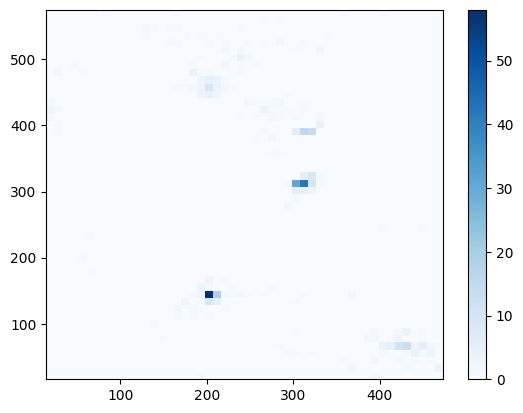

In [192]:
# data=pd.read_csv("20230623.csv")
plt.hist2d(data['y'], data['x'], bins=50, cmap='Blues')
plt.colorbar()
plt.show()

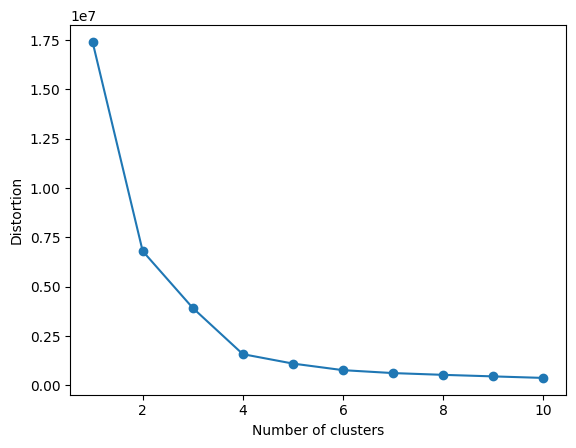

In [193]:
#elbow
distortions = []

for i in range(1,11):                 
    km = KMeans(n_clusters=i,
                init='k-means++',     
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(data3)                        
    distortions.append(km.inertia_)   

plt.plot(range(1,11),distortions,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [194]:
N=4

In [195]:
km = KMeans(n_clusters=N, random_state=42)
label = km.fit_predict(data2[:])

In [196]:
label

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

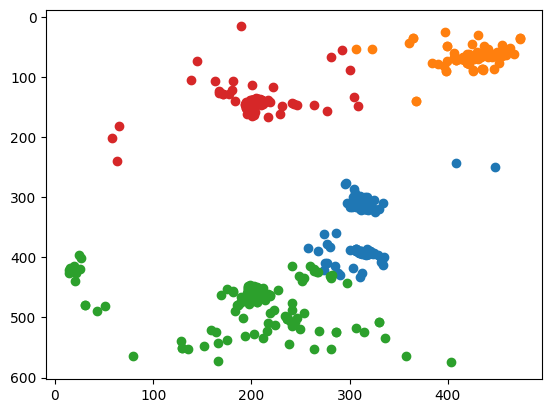

In [197]:
plt.gca().invert_yaxis()  # y軸を反転する
for i in range(N):
    plt.scatter(data.loc[:, ['y']][label==i], data.loc[:, ['x']][label==i])
# plt.scatter(data.loc[:, ['z']][label==0], data.loc[:, ['x']][label==0])
# plt.scatter(data.loc[:, ['z']][label==1], data.loc[:, ['x']][label==1])
# plt.scatter(data.loc[:, ['z']][label==2], data.loc[:, ['x']][label==2])
# plt.scatter(data.loc[:, ['z']][label==3], data.loc[:, ['x']][label==3])
plt.show()

In [198]:
dd1=data.loc[:, ['y']][label==0]
ddList1 = dd1["y"].index.to_list()
dd2=data.loc[:, ['y']][label==1]
ddList2 = dd2["y"].index.to_list()
dd3=data.loc[:, ['y']][label==2]
ddList3 = dd3["y"].index.to_list()
dd4=data.loc[:, ['y']][label==3]
ddList4 = dd4["y"].index.to_list()

In [199]:
ddList3

[15,
 16,
 17,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 89,
 90,
 91,
 92,
 381,
 383,
 385,
 386,
 436,
 437,
 438,
 572,
 573,
 574,
 575,
 576,
 577,
 578,
 579,
 580,
 583,
 584,
 585,
 586,
 587,
 589,
 590,
 591,
 601,
 602,
 605,
 606,
 607,
 608,
 609,
 610,
 675,
 676,
 678,
 684,
 685,
 686,
 687,
 690,
 691,
 692,
 693,
 694,
 695,
 792,
 793,
 794,
 795,
 796,
 797]

[0.49771526, 0.33909252, 0.3631886, 0.35386556]
[0.39218265, 0.49211714, 0.28906813, 0.31121197]
[0.5134016, 0.38000986, 0.3722069, 0.53703314]
[0.43266922, 0.35307828, 0.41979924, 0.38140476]


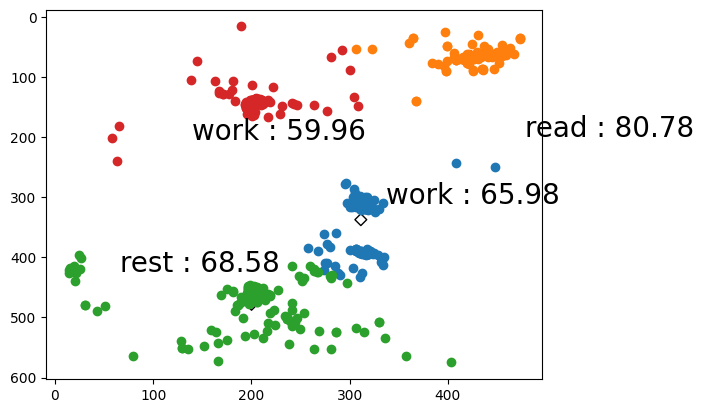

In [202]:
dd1=data.loc[:, ['y']][label==0]
ddList1 = dd1["y"].index.to_list()
dd2=data.loc[:, ['y']][label==1]
ddList2 = dd2["y"].index.to_list()
dd3=data.loc[:, ['y']][label==2]
ddList3 = dd3["y"].index.to_list()
dd4=data.loc[:, ['y']][label==3]
ddList4 = dd4["y"].index.to_list()

observedList1 =[]
for i in ddList1:
    if(interaction_array[i]!="none"):
        observedList1.append(interaction_array[i])
        if(action_array[i]=="laying"):
            observedList1.append(action_array[i])
        observedList1.append(interaction_with_array[i])

observedList2 =[]
for i in ddList2:
    if(action_array[i]=="laying"):
            observedList2.append(action_array[i])
    if(interaction_array[i]!="none"): 
        observedList2.append(interaction_array[i])
        observedList2.append(interaction_with_array[i]) 

observedList3 =[]
for i in ddList3:
    if(action_array[i]=="laying"):
            observedList3.append(action_array[i])
    if(interaction_array[i]!="none"):
        observedList3.append(interaction_array[i])
        observedList3.append(interaction_with_array[i])

observedList4 =[]
for i in ddList4:
    if(action_array[i]=="laying"):
            observedList4.append(action_array[i])
    if(interaction_array[i]!="none"):
        observedList4.append(interaction_array[i])
        observedList4.append(interaction_with_array[i])

split_values = []
original_values = []
for item in observedList1:
    split_items = item.split(',')
    split_values.extend(split_items)
    original_values.extend([item] * len(split_items))

split_values2 = []
original_values2 = []
for item in observedList2:
    split_items = item.split(',')
    split_values2.extend(split_items)
    original_values2.extend([item] * len(split_items))

split_values3 = []
original_values3 = []
for item in observedList3:
    split_items = item.split(',')
    split_values3.extend(split_items)
    original_values3.extend([item] * len(split_items))

split_values4 = []
original_values4 = []
for item in observedList4:
    split_items = item.split(',')
    split_values4.extend(split_items)
    original_values4.extend([item] * len(split_items))

centers = km.cluster_centers_
plt.gca().invert_yaxis()  # y軸を反転する
plt.scatter(centers[:, 1], centers[:, 0], marker="D", facecolors='none', edgecolors='black')
observed_lists = [split_values, split_values2, split_values3, split_values4]
utilization_class_list = ['work','rest','dining','read']
utilization = 'none'

for i, observed_list in enumerate(observed_lists):
    score = [np.mean([model.similarity(utilization, observe) for observe in observed_list]) 
             for utilization in utilization_class_list]
    max_socre = np.max(score)

    similar_list = model.most_similar(f"{utilization}")
    most_similar_score =similar_list[0][1]
    prob = max_socre / most_similar_score *100

    max_index = np.argmax(score)
    print(score)
    utilization = utilization_class_list[max_index]
    plt.scatter(data.loc[:, ['y']][label==i], data.loc[:, ['x']][label==i])
    if prob>50:
        plt.text(centers[i][0], centers[i][1], f"{utilization} : {round(prob, 2)}", fontsize=20)
    else:
        plt.text(centers[i][0], centers[i][1], f"unknown", fontsize=20)


In [144]:
similar_list = model.most_similar('work')
for similar_set in similar_list:
    print(str(similar_set[0])+ " : " + str(similar_set[1]))

works : 0.717581570148468
working : 0.6682043671607971
job : 0.6681519746780396
Work : 0.642331063747406
work. : 0.6332440972328186
research : 0.6295222640037537
work- : 0.6242907047271729
doing : 0.6225779056549072
effort : 0.6146255731582642
work-- : 0.6137425303459167


In [38]:
wordsList = ["keyboard", "cellphone", "bottle", "book", "carpet", "cushion", "food", "sitting", "standing", "walking", "drinking", "reading", "calling", "working", "holding", "laying", "eating"]
for words in wordsList:
    print(f'{words}',model.similarity('rest', f'{words}'))

keyboard 0.31203625
cellphone 0.25265887
bottle 0.33842653
book 0.3641611
carpet 0.2568283
cushion 0.38140517
food 0.35949716
sitting 0.43288422
standing 0.42370832
walking 0.3849271
drinking 0.32320073
reading 0.39848146
calling 0.31895646
working 0.37415615
holding 0.35244563
laying 0.50218946
eating 0.36787632


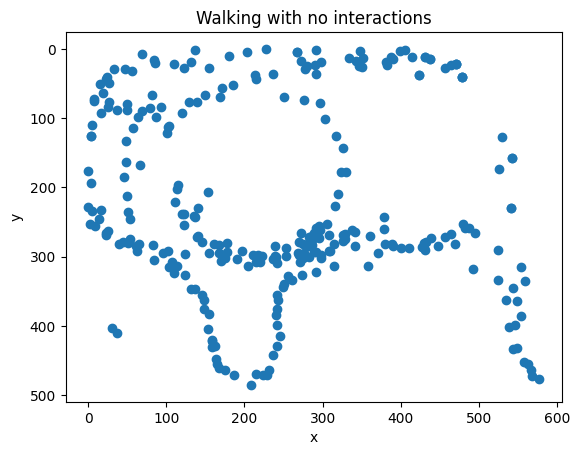

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルを読み込む
df = pd.read_csv('0705_1.csv')

# 条件に合致する行を抽出する
filtered_df = df[(df['action'] == 'walking') & (df['interactions'] == 'none')]

# x列とy列を取得
x_values = filtered_df['x']
y_values = filtered_df['y']

# プロット
plt.scatter(x_values, y_values)
plt.gca().invert_yaxis()  # y軸を反転する
plt.xlabel('x')
plt.ylabel('y')
plt.title('Walking with no interactions')
plt.show()
